# **Fuzzy control system for Sleep recommendation**

## Ranim Ourari  |  23-105-067

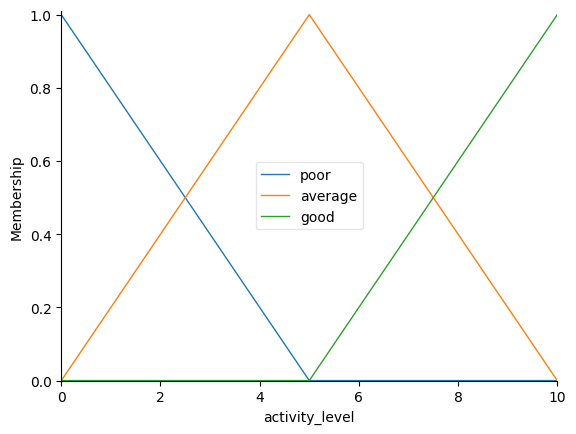

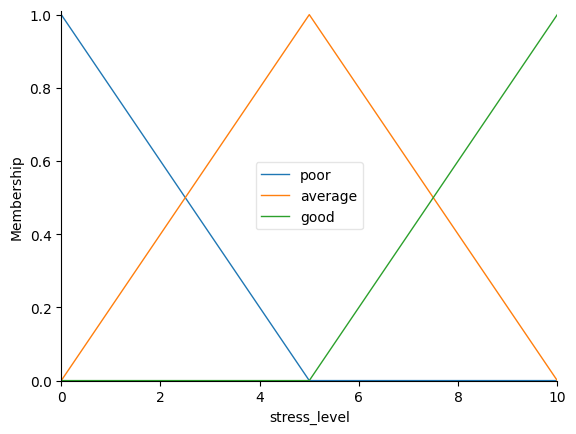

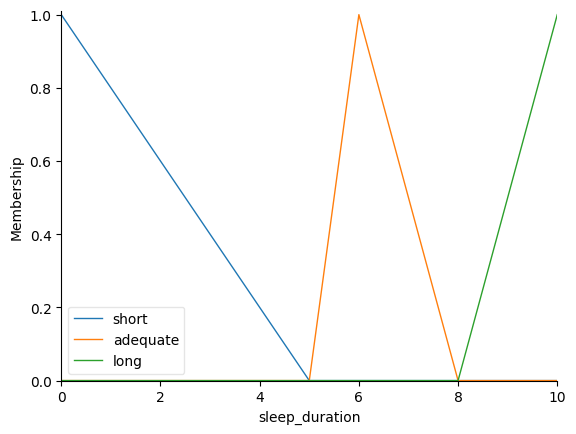

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

activity_level = ctrl.Antecedent(np.arange(0, 11, 1), 'activity_level')
stress_level = ctrl.Antecedent(np.arange(0, 11, 1), 'stress_level')
sleep_duration = ctrl.Consequent(np.arange(0, 11, 1), 'sleep_duration')

activity_level.automf(3)
stress_level.automf(3)

sleep_duration['short'] = fuzz.trimf(sleep_duration.universe, [0, 0, 5])
sleep_duration['adequate'] = fuzz.trimf(sleep_duration.universe, [5, 6, 8])
sleep_duration['long'] = fuzz.trimf(sleep_duration.universe, [8, 10, 10])

activity_level.view()


In [ ]:
stress_level.view()

In [ ]:
sleep_duration.view()

In [ ]:
rule1 = ctrl.Rule(activity_level['poor'] | stress_level['good'], sleep_duration['long'])
rule2 = ctrl.Rule(stress_level['average'], sleep_duration['adequate'])
rule3 = ctrl.Rule(activity_level['good'] | stress_level['poor'], sleep_duration['short'])


In [ ]:
sleep_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
sleep_simulation = ctrl.ControlSystemSimulation(sleep_ctrl)

Recommended sleep duration: 5.360982015892932 hours


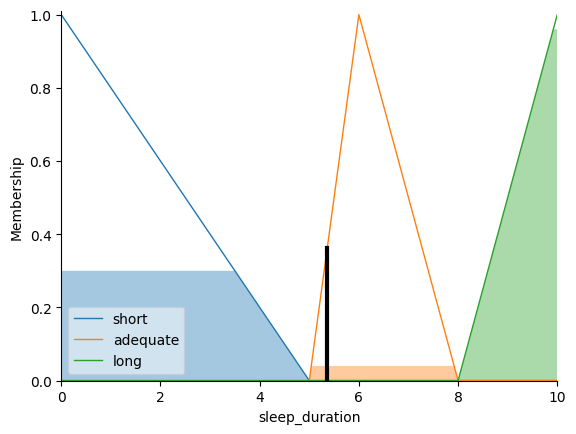

In [ ]:
sleep_simulation.input['activity_level'] = 6.5
sleep_simulation.input['stress_level'] = 9.8

sleep_simulation.compute()

print(f"Recommended sleep duration: {sleep_simulation.output['sleep_duration']} hours")
sleep_duration.view(sim=sleep_simulation)

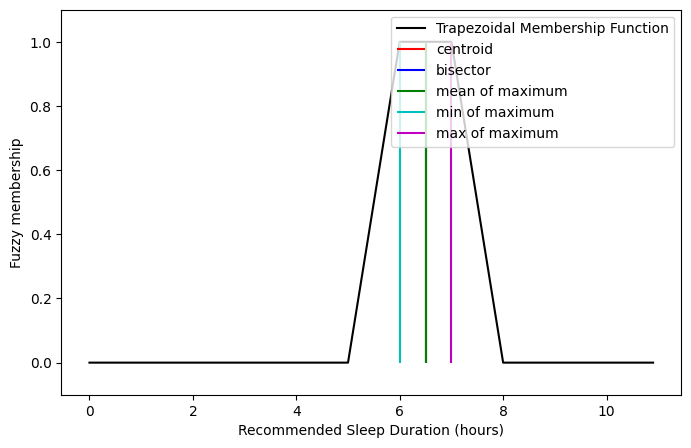

In [ ]:
x = np.arange(0, 11, 0.1)
mfx = fuzz.trapmf(x, [5, 6, 7, 8])

defuzz_centroid = fuzz.defuzz(x, mfx, 'centroid')
defuzz_bisector = fuzz.defuzz(x, mfx, 'bisector')
defuzz_mom = fuzz.defuzz(x, mfx, 'mom')
defuzz_som = fuzz.defuzz(x, mfx, 'som')
defuzz_lom = fuzz.defuzz(x, mfx, 'lom')

labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum', 'max of maximum']
xvals = [defuzz_centroid, defuzz_bisector, defuzz_mom, defuzz_som, defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x, mfx, i) for i in xvals]

plt.figure(figsize=(8, 5))
plt.plot(x, mfx, 'k', label='Trapezoidal Membership Function')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Fuzzy membership')
plt.xlabel('Recommended Sleep Duration (hours)')
plt.ylim(-0.1, 1.1)
plt.legend(loc='upper right')

plt.show()
